In [1]:
# Build a Softmax Regression Model (accuracy on test set: 0.9222)
# Load MNIST Data: download and read in the data automatically
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# Start TensorFlow InteractiveSession
import tensorflow as tf
sess = tf.InteractiveSession()

# Placeholders: We start building the computation graph by creating nodes for the input images and target output classes
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Variables: weights and biases
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# takes initial values (in this case tensors full of zeros) that have already been specified, and assigns them to each Variable
sess.run(tf.global_variables_initializer())

# ---------- Regression Model -------------
# Predicted Class
y = tf.matmul(x,W) + b

# Loss Function
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

# Train the Model
# Add operations to the computation graph: compute gradients, compute parameter update steps, and apply update steps to the parameters
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Repeatedly run train_step
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
# Evaluate the Model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))



Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.9222


In [5]:
# Build a Multilayer Convolutional Network (accuracy: 0.9917)

# Weight Initialization
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

# Convolution and Pooling
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# First Convolutional Layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# reshape x to a 4d tensor
x_image = tf.reshape(x, [-1,28,28,1])

# convolve x_image with the weight tensor, add the bias, apply the ReLU function, and finally max pool
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1) # The max_pool_2x2 method will reduce the image size to 14x14

# Second Convolutional Layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


# Densely Connected Layer: add a fully-connected layer with 1024 neurons to allow processing on the entire image
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout: To reduce overfitting, we will apply dropout before the readout layer
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Readout Layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# Train and Evaluate the Model
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))


step 0, training accuracy 0.06
step 100, training accuracy 0.86
step 200, training accuracy 0.9
step 300, training accuracy 0.9
step 400, training accuracy 0.96
step 500, training accuracy 0.96
step 600, training accuracy 0.9
step 700, training accuracy 0.96
step 800, training accuracy 0.98
step 900, training accuracy 0.96
step 1000, training accuracy 0.96
step 1100, training accuracy 0.96
step 1200, training accuracy 0.9
step 1300, training accuracy 0.98
step 1400, training accuracy 0.98
step 1500, training accuracy 1
step 1600, training accuracy 0.94
step 1700, training accuracy 0.94
step 1800, training accuracy 0.94
step 1900, training accuracy 0.94
step 2000, training accuracy 0.98
step 2100, training accuracy 1
step 2200, training accuracy 0.98
step 2300, training accuracy 0.98
step 2400, training accuracy 1
step 2500, training accuracy 0.96
step 2600, training accuracy 0.98
step 2700, training accuracy 1
step 2800, training accuracy 0.98
step 2900, training accuracy 1
step 3000, 

In [8]:
# Save checkpoint
saver = tf.train.Saver()
saver.save(sess, 'checkpoint_mnist/model.ckpt')

'checkpoint_mnist/model.ckpt'

## Setup

In [36]:
from __future__ import print_function, division
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# A bunch of utility functions

def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

def preprocess_img(x):
    return 2 * x - 1.0

def deprocess_img(x):
    return (x + 1.0) / 2.0

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

## Dataset

Extracting ./datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./datasets/MNIST_data/t10k-labels-idx1-ubyte.gz
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


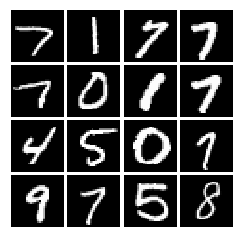

In [37]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./datasets/MNIST_data', one_hot=True) # include one-hot labels

# show a batch
next_batch = mnist.train.next_batch(16)
show_images(next_batch[0])
print (next_batch[1]) # labels

In [108]:
!pip install sklearn

    100% |████████████████████████████████| 11.7MB 134kB/s eta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/liezl/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn


In [109]:
from sklearn.metrics import confusion_matrix
num_classes = 10
def plot_confusion_matrix(cls_pred, cls_true):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

## LeakyReLU

In [48]:
def leaky_relu(x, alpha=0.01):
    """Compute the leaky ReLU activation function.
    
    Inputs:
    - x: TensorFlow Tensor with arbitrary shape
    - alpha: leak parameter for leaky ReLU
    
    Returns:
    TensorFlow Tensor with the same shape as x
    """
    act = tf.maximum(alpha * x, x)

    act = tf.cast(act, tf.float32)
    return act


## Random Noise

In [49]:
def sample_noise(batch_size, dim):
    """Generate random uniform noise from -1 to 1.
    
    Inputs:
    - batch_size: integer giving the batch size of noise to generate
    - dim: integer giving the dimension of the the noise to generate
    
    Returns:
    TensorFlow Tensor containing uniform noise in [-1, 1] with shape [batch_size, dim]
    """
    # sample and return noise
    return tf.random_uniform((batch_size, dim), -1, 1, dtype=tf.float32)


## Downsample Image

In [50]:
def downsampled_img(batch_size, img, K):
    """Downsample image
    
    Inputs:
    - batch_size: integer giving the batch size
    - img: input image
    
    Returns:
    TensorFlow Tensor of downsized img
    """
    IMAGE_SIZE = 28
    img = tf.reshape(img, (batch_size, IMAGE_SIZE, IMAGE_SIZE, 1))
    x_small = tf.image.resize_bicubic(img, (int(IMAGE_SIZE/K), int(IMAGE_SIZE/K)))
    x_small = tf.reshape(x_small, (batch_size, -1))
    return x_small

## Conditional Discriminator/Generator

In [51]:
def discriminator(x, y):
    """Compute discriminator score for a batch of input images.

    Inputs:
    - x: TensorFlow Tensor of flattened input images, shape [batch_size, 784]

    Returns:
    TensorFlow Tensor with shape [batch_size, 1], containing the score
    for an image being real for each input image.
    """
    with tf.variable_scope("discriminator"):
        inputs = tf.concat(values=[x, y], axis=1)

        fc1 = tf.layers.dense(inputs=inputs, units=256, activation=leaky_relu)
        fc2 = tf.layers.dense(inputs=fc1, units=256, activation=leaky_relu)
        logits = tf.layers.dense(inputs=fc2, units=1, activation=None)
        return logits

def generator(z, y):
    """Generate images from a random noise vector.

    Inputs:
    - z: TensorFlow Tensor of random noise with shape [batch_size, noise_dim]

    Returns:
    TensorFlow Tensor of generated images, with shape [batch_size, 784].
    """
    with tf.variable_scope("generator"):
        inputs = tf.concat(values=[z, y], axis=1)

        fc1 = tf.layers.dense(inputs=inputs, units=1024, activation=tf.nn.relu)
        fc2 = tf.layers.dense(inputs=fc1, units=1024, activation=tf.nn.relu)
        img = tf.layers.dense(inputs=fc2, units=784, activation=tf.nn.tanh)
        return img

## GAN Loss

In [52]:
def gan_loss(logits_real, logits_fake, generator_output, original_image, original_image_downscaled, batch_size):
    """Compute the GAN loss.
    
    Inputs:
    - logits_real: Tensor, shape [batch_size, 1], output of discriminator
        Log probability that the image is real for each real image
    - logits_fake: Tensor, shape[batch_size, 1], output of discriminator
        Log probability that the image is real for each fake image
    
    Returns:
    - D_loss: discriminator loss scalar
    - G_loss: generator loss scalar
    """
    alpha = 0.9 # higher: weight more towards using content loss 
    
    # compute D_loss and G_loss
    D_loss = -tf.reduce_mean(tf.log(tf.nn.sigmoid(logits_real)), 0) - tf.reduce_mean(tf.log(1.0 - tf.nn.sigmoid(logits_fake)), 0)
    G_loss = -tf.reduce_mean(tf.log(tf.nn.sigmoid(logits_fake)), 0)
    
#     downscaled_gen_output = downsampled_img(batch_size, generator_output, 4)
    generator_l1_loss  = tf.reduce_mean(tf.abs(generator_output - original_image), name='gene_l1_loss')
    G_loss = tf.add((1.0 - alpha) * G_loss, alpha * generator_l1_loss)
    D_loss = tf.cast(D_loss, tf.float32)[0]
    G_loss = tf.cast(G_loss, tf.float32)[0]
    return D_loss, G_loss

## Optimizing our loss

In [53]:
# create an AdamOptimizer for D_solver and G_solver
def get_solvers(learning_rate=1e-3, beta1=0.5):
    """Create solvers for GAN training.
    
    Inputs:
    - learning_rate: learning rate to use for both solvers
    - beta1: beta1 parameter for both solvers (first moment decay)
    
    Returns:
    - D_solver: instance of tf.train.AdamOptimizer with correct learning_rate and beta1
    - G_solver: instance of tf.train.AdamOptimizer with correct learning_rate and beta1
    """
    D_solver = tf.train.AdamOptimizer(learning_rate, beta1)
    G_solver = tf.train.AdamOptimizer(learning_rate, beta1)

    return D_solver, G_solver

## Putting it all together


In [54]:
tf.reset_default_graph()

# number of images for each batch
batch_size = 128
# our noise dimension
noise_dim = 100
# number of labels
num_labels = mnist.train.labels.shape[1]

# placeholder for images from the training dataset
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, shape=[None, num_labels])

# random noise fed into our generator
z = downsampled_img(batch_size, x, 4)
# z = sample_noise(batch_size, noise_dim)
z = tf.cast(z, tf.float32)

# generated images
G_sample = generator(z, y)

with tf.variable_scope("") as scope:
    #scale images to be -1 to 1
    logits_real = discriminator(preprocess_img(x), y)
    # Re-use discriminator weights on new inputs
    scope.reuse_variables()
    logits_fake = discriminator(G_sample, y)

# Get the list of variables for the discriminator and generator
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'generator') 

# get our solver
D_solver, G_solver = get_solvers()

# get our loss
D_loss, G_loss = gan_loss(logits_real, logits_fake, G_sample, x, z, batch_size)

# setup training steps
D_train_step = D_solver.minimize(D_loss, var_list=D_vars)
G_train_step = G_solver.minimize(G_loss, var_list=G_vars)
D_extra_step = tf.get_collection(tf.GraphKeys.UPDATE_OPS, 'discriminator')
G_extra_step = tf.get_collection(tf.GraphKeys.UPDATE_OPS, 'generator')

# Get Test Files
To share across CGAN and Vanilla-GAN

In [55]:
testbatch,testbatch_y = mnist.test.next_batch(batch_size)

## Training a CGAN

In [65]:
# a giant helper function
def run_a_gan(sess, G_train_step, G_loss, D_train_step, D_loss, G_extra_step, D_extra_step,\
              show_every=250, print_every=50, batch_size=128, num_epoch=10):
    """Train a GAN for a certain number of epochs.
    
    Inputs:
    - sess: A tf.Session that we want to use to run our data
    - G_train_step: A training step for the Generator
    - G_loss: Generator loss
    - D_train_step: A training step for the Generator
    - D_loss: Discriminator loss
    - G_extra_step: A collection of tf.GraphKeys.UPDATE_OPS for generator
    - D_extra_step: A collection of tf.GraphKeys.UPDATE_OPS for discriminator
    Returns:
        Nothing
    """
    num_samples = 16

    # compute the number of iterations we need
    max_iter = int(mnist.train.num_examples*num_epoch/batch_size)
    for it in range(max_iter):
        # every show often, show a sample result
        minibatch,minibatch_y = mnist.train.next_batch(batch_size)
        if it % show_every == 0:
            
            downsampled = sess.run(z, feed_dict={x: minibatch})
            samples = sess.run(G_sample, feed_dict={x: minibatch, y:minibatch_y})
            
            original_fig = show_images(minibatch[:num_samples])
            plt.show()
            downsampled_fig = show_images(downsampled[:num_samples])
            plt.show()
            fig = show_images(samples[:num_samples])
            plt.show()
            
            print()
        # run a batch of data through the network
        
        _, D_loss_curr = sess.run([D_train_step, D_loss], feed_dict={x: minibatch, y:minibatch_y})
        _, G_loss_curr = sess.run([G_train_step, G_loss], feed_dict={x: minibatch, y:minibatch_y})

        # print loss every so often.
        # We want to make sure D_loss doesn't go to 0
        if it % print_every == 0:
            print('Iter: {}, D: {:.4}, G:{:.4}'.format(it,D_loss_curr,G_loss_curr))
    print('Final images')
    downsampled = sess.run(z, feed_dict={x: testbatch, y:testbatch_y})
    samples = sess.run(G_sample, feed_dict={x: testbatch, y:testbatch_y})

    original_fig = show_images(testbatch[:num_samples])
    plt.show()
    downsampled_fig = show_images(downsampled[:num_samples])
    plt.show()
    fig = show_images(samples[:num_samples])
    plt.show()
    print( samples.shape)
    return samples

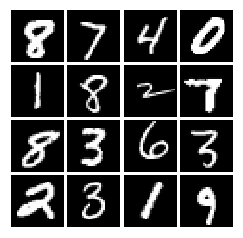

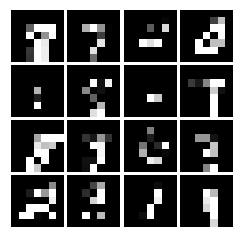

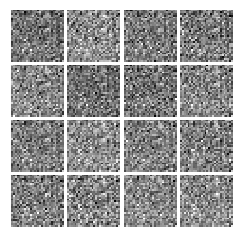


Iter: 0, D: 1.211, G:0.2225
Iter: 50, D: 1.147, G:0.358
Iter: 100, D: 1.255, G:0.4378
Iter: 150, D: 0.3073, G:0.521
Iter: 200, D: 0.6217, G:0.7632


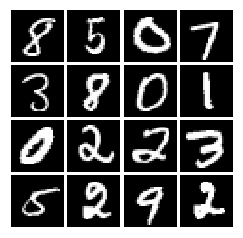

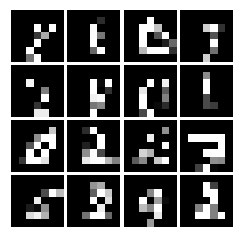

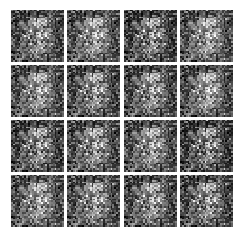


Iter: 250, D: 0.487, G:0.614
Iter: 300, D: 0.7117, G:1.007
Iter: 350, D: 1.054, G:0.6241
Iter: 400, D: 0.3968, G:0.8457
Iter: 450, D: 0.2956, G:0.8175


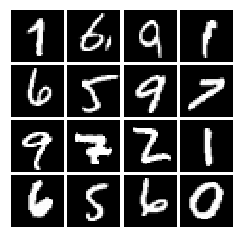

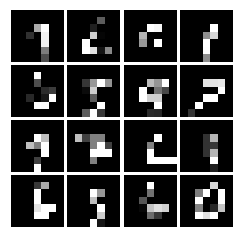

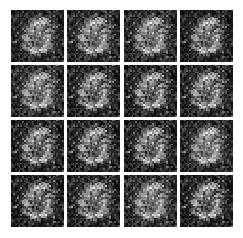


Iter: 500, D: 1.651, G:1.031
Iter: 550, D: 0.6611, G:0.9907
Iter: 600, D: 0.2835, G:0.8389
Iter: 650, D: 0.7369, G:0.8011
Iter: 700, D: 0.6815, G:0.777


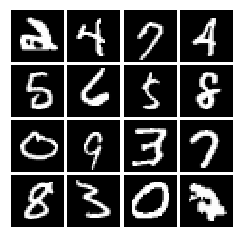

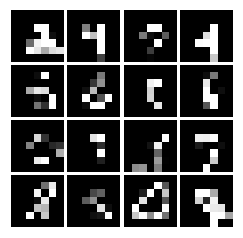

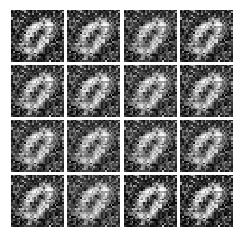


Iter: 750, D: 0.4312, G:0.8992
Iter: 800, D: 1.01, G:0.7662
Iter: 850, D: 1.077, G:0.948
Iter: 900, D: 0.7525, G:0.8039
Iter: 950, D: 0.6096, G:0.9946


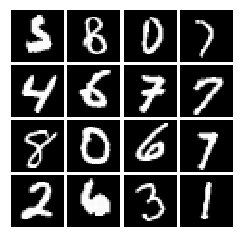

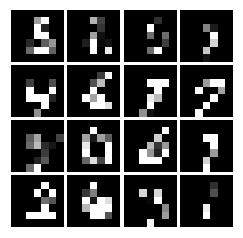

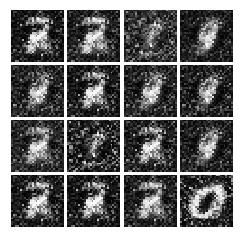


Iter: 1000, D: 0.5727, G:0.806
Iter: 1050, D: 0.8952, G:0.8247
Iter: 1100, D: 0.7849, G:0.8703
Iter: 1150, D: 0.916, G:0.9301
Iter: 1200, D: 0.8668, G:0.9087


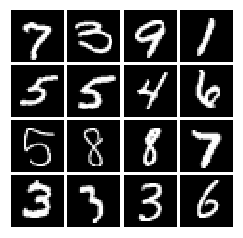

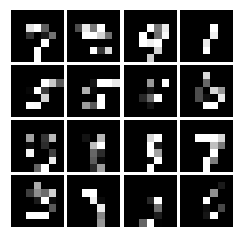

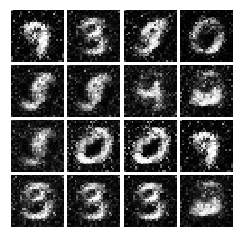


Iter: 1250, D: 1.456, G:0.7846
Iter: 1300, D: 0.8206, G:0.8611
Iter: 1350, D: 0.9506, G:0.8156
Iter: 1400, D: 0.9459, G:0.8587
Iter: 1450, D: 1.054, G:0.9089


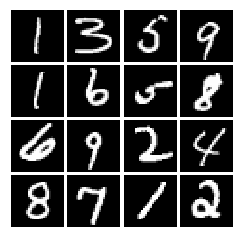

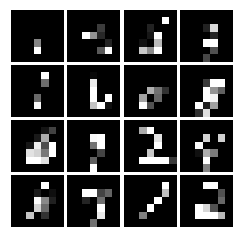

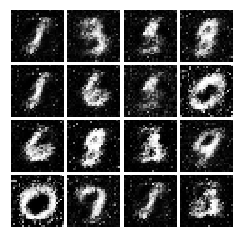


Iter: 1500, D: 1.033, G:0.8597
Iter: 1550, D: 0.96, G:0.8339
Iter: 1600, D: 0.9911, G:0.8411
Iter: 1650, D: 1.139, G:0.9498
Iter: 1700, D: 1.378, G:0.9755


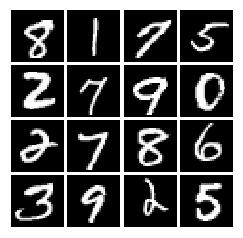

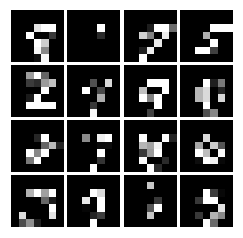

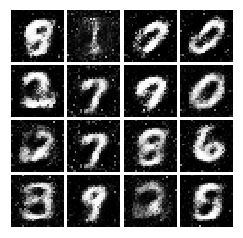


Iter: 1750, D: 0.9924, G:0.8065
Iter: 1800, D: 0.9961, G:0.8889
Iter: 1850, D: 1.113, G:0.8448
Iter: 1900, D: 1.102, G:0.865
Iter: 1950, D: 1.262, G:0.9032


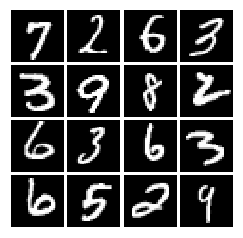

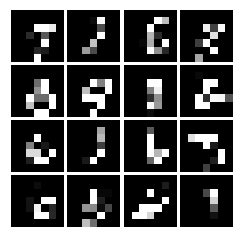

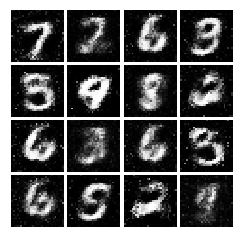


Iter: 2000, D: 1.539, G:0.8065
Iter: 2050, D: 1.104, G:0.8535
Iter: 2100, D: 1.104, G:0.867
Iter: 2150, D: 1.225, G:0.9065
Iter: 2200, D: 1.123, G:0.8841


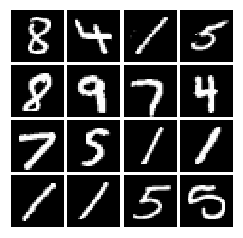

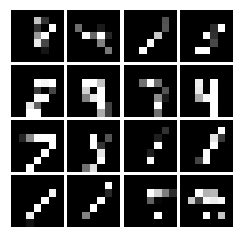

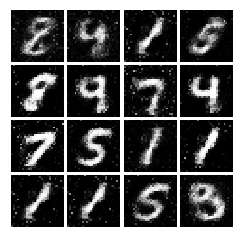


Iter: 2250, D: 1.318, G:0.8059
Iter: 2300, D: 1.242, G:0.8648
Iter: 2350, D: 1.086, G:0.8686
Iter: 2400, D: 1.243, G:0.9091
Iter: 2450, D: 1.128, G:0.8409


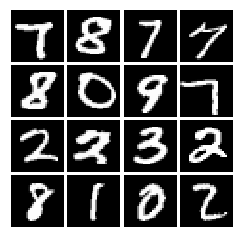

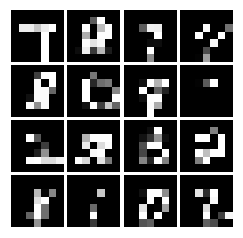

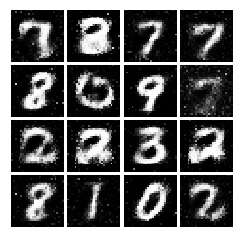


Iter: 2500, D: 1.095, G:0.8307
Iter: 2550, D: 1.335, G:0.9006
Iter: 2600, D: 1.218, G:0.9154
Iter: 2650, D: 1.102, G:0.8419
Iter: 2700, D: 1.104, G:0.8581


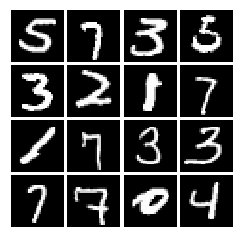

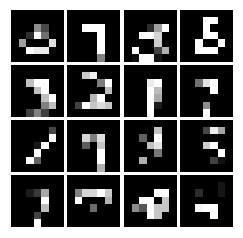

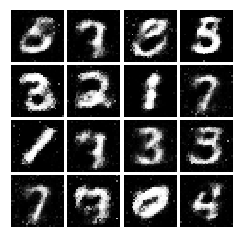


Iter: 2750, D: 1.186, G:0.8416
Iter: 2800, D: 1.128, G:0.8688
Iter: 2850, D: 1.192, G:0.859
Iter: 2900, D: 1.23, G:0.8438
Iter: 2950, D: 1.187, G:0.885


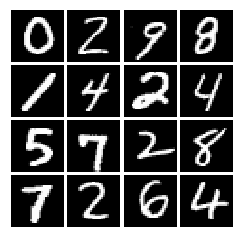

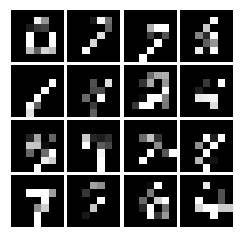

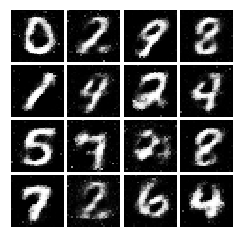


Iter: 3000, D: 1.227, G:0.8348
Iter: 3050, D: 1.259, G:0.8384
Iter: 3100, D: 1.236, G:0.8609
Iter: 3150, D: 1.144, G:0.8424
Iter: 3200, D: 1.132, G:0.852


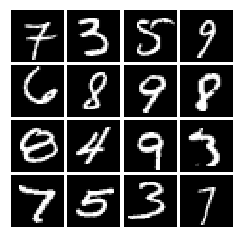

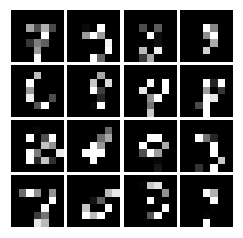

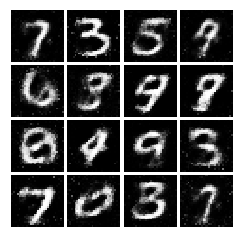


Iter: 3250, D: 1.244, G:0.8502
Iter: 3300, D: 1.199, G:0.8725
Iter: 3350, D: 1.256, G:0.9006
Iter: 3400, D: 1.178, G:0.8729
Iter: 3450, D: 1.118, G:0.8673


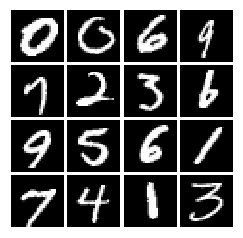

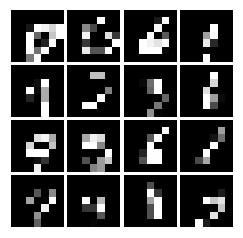

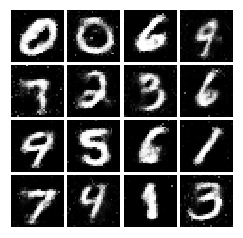


Iter: 3500, D: 1.138, G:0.8786
Iter: 3550, D: 1.127, G:0.8736
Iter: 3600, D: 1.216, G:0.884
Iter: 3650, D: 1.1, G:0.8625
Iter: 3700, D: 1.233, G:0.8542


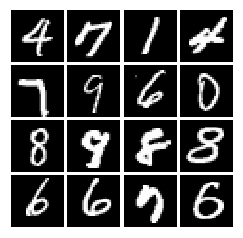

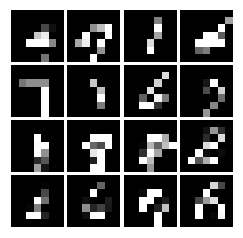

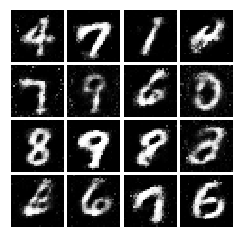


Iter: 3750, D: 1.22, G:0.869
Iter: 3800, D: 1.296, G:0.9027
Iter: 3850, D: 1.194, G:0.8578
Iter: 3900, D: 1.184, G:0.8727
Iter: 3950, D: 1.415, G:0.8986


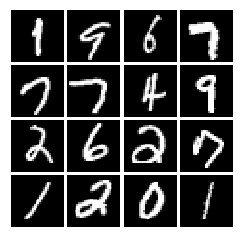

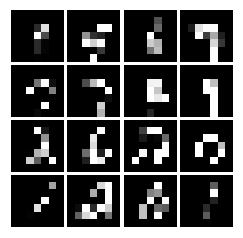

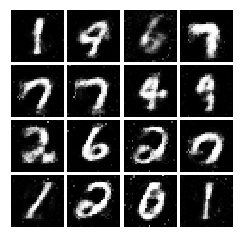


Iter: 4000, D: 1.305, G:0.8899
Iter: 4050, D: 1.319, G:0.8822
Iter: 4100, D: 1.223, G:0.857
Iter: 4150, D: 1.176, G:0.9009
Iter: 4200, D: 1.214, G:0.8745


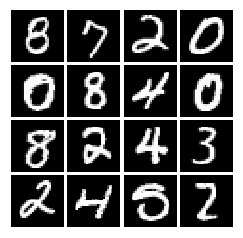

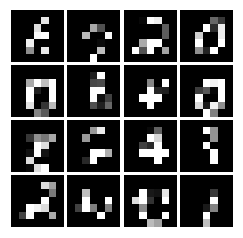

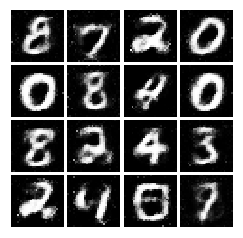


Iter: 4250, D: 1.109, G:0.8543
Final images


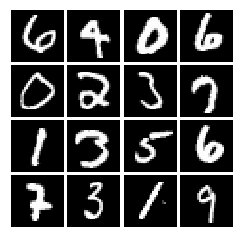

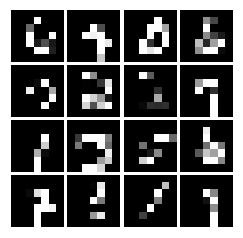

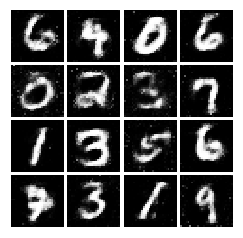

(128, 784)
(128, 784)
(128, 10)
test accuracy CGAN 0.84375


In [66]:
sess = get_session()
sess.run(tf.global_variables_initializer())
cgan_output_images = run_a_gan(sess,G_train_step,G_loss,D_train_step,D_loss,G_extra_step,D_extra_step)

print(cgan_output_images.shape)
print(testbatch_y.shape)

print("test accuracy CGAN %g"%sess_classifier.run(accuracy, feed_dict={
    x_class: cgan_output_images, y_: testbatch_y, keep_prob: 1.0}))

In [104]:
# get probability distribution for a single image
img_index = 6 # SET THIS to whichever image from the batch you want

# softmax distributions 
prob_dist_orig = sess_classifier.run(y_conv, feed_dict={
    x_class: testbatch, y_: testbatch_y, keep_prob: 1.0})
prob_dist_cgan = sess_classifier.run(y_conv, feed_dict={
    x_class: cgan_output_images, y_: testbatch_y, keep_prob: 1.0})

# the correct values
predicted_val_orig = sess_classifier.run(tf.argmax(y_conv,1), feed_dict={
    x_class: testbatch, y_: testbatch_y, keep_prob: 1.0})
predicted_val_cgan = sess_classifier.run(tf.argmax(y_conv,1), feed_dict={
    x_class: cgan_output_images, y_: testbatch_y, keep_prob: 1.0})
true_val_orig = sess_classifier.run( tf.argmax(y_,1), feed_dict={
    x_class: testbatch, y_: testbatch_y, keep_prob: 1.0})
true_val_cgan = sess_classifier.run( tf.argmax(y_,1), feed_dict={
    x_class: cgan_output_images, y_: testbatch_y, keep_prob: 1.0})


# do we have a correct prediction?
correctness_orig = sess_classifier.run(correct_prediction, feed_dict={
    x_class: testbatch, y_: testbatch_y, keep_prob: 1.0})
correctness_cgan = sess_classifier.run(correct_prediction, feed_dict={
    x_class: cgan_output_images, y_: testbatch_y, keep_prob: 1.0})

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

print('index', img_index)
print('predicted original', predicted_val_orig[img_index])
print('predicted vanilla', predicted_val_cgan[img_index])
print('true original', true_val_orig[img_index])

print("correctness for original test image (full resolution)" +  str(correctness_orig[img_index]))
print("correctness for CGAN generated test images (superresolved)" +  str(correctness_cgan[img_index]))

print( testbatch_y[img_index])
print("probability distribution for original test image (full resolution)" +  str(softmax(prob_dist_orig[img_index])))
print("probability distribution for CGAN generated test images (superresolved)" +  str(softmax(prob_dist_cgan[img_index])))

index 6
predicted original 3
predicted vanilla 3
true original 3
correctness for original test image (full resolution)True
correctness for CGAN generated test images (superresolved)True
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
probability distribution for original test image (full resolution)[  8.46559356e-09   1.38283963e-06   6.03768385e-05   9.99927759e-01
   9.39720746e-10   1.23718650e-07   1.92484375e-08   4.25111857e-08
   9.80505683e-06   5.93854452e-07]
probability distribution for CGAN generated test images (superresolved)[  3.97351897e-14   4.06148374e-01   1.21474229e-02   5.81515551e-01
   4.23237800e-09   1.67593171e-04   2.07883141e-10   2.10972248e-05
   6.40107457e-15   3.36217787e-09]


(128,)
(128, 10)
[[11  0  0  0  0  1  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  1  0  0]
 [ 0  0  0 10  0  2  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  1  0  0  0  0 15  0  0  0]
 [ 0  0  1  0  0  1  0 13  0  0]
 [ 0  0  4  0  1  0  0  0  1  0]
 [ 0  2  0  0  5  0  0  1  0  5]]


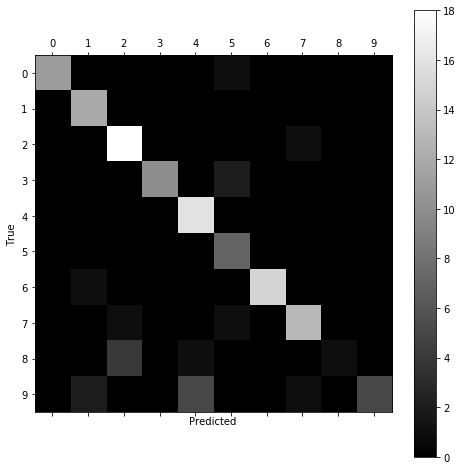

In [113]:
print (predicted_val_cgan.shape)
print (testbatch_y.shape)
plot_confusion_matrix(predicted_val_cgan, true_val_orig)

## Training a Vanilla GAN

In [68]:
def vanilla_discriminator(x):
    """Compute discriminator score for a batch of input images.
    
    Inputs:
    - x: TensorFlow Tensor of flattened input images, shape [batch_size, 784]
    
    Returns:
    TensorFlow Tensor with shape [batch_size, 1], containing the score 
    for an image being real for each input image.
    """
    with tf.variable_scope("vanilla_discriminator"):
        fc1 = tf.layers.dense(inputs=x, units=256, activation=leaky_relu)
        fc2 = tf.layers.dense(inputs=fc1, units=256, activation=leaky_relu)
        logits = tf.layers.dense(inputs=fc2, units=1)
       
        logits = tf.cast(logits, tf.float32)

        return logits

def vanilla_generator(z):
    """Generate images from a random noise vector.
    
    Inputs:
    - z: TensorFlow Tensor of random noise with shape [batch_size, noise_dim]
    
    Returns:
    TensorFlow Tensor of generated images, with shape [batch_size, 784].
    """
    with tf.variable_scope("vanilla_generator"):
        # implement architecture
        fc1 = tf.layers.dense(inputs=z, units=1024, activation=tf.nn.relu)
        fc2 = tf.layers.dense(inputs=fc1, units=1024, activation=tf.nn.relu)
        fc3 = tf.layers.dense(inputs=fc2, units=784)
        img = tf.tanh(fc3)
        img = tf.cast(img, tf.float32)
        return img

In [69]:
# a giant helper function
def run_a_gan(sess, G_train_step, G_loss, D_train_step, D_loss, G_extra_step, D_extra_step,\
              show_every=250, print_every=50, batch_size=128, num_epoch=10):
    """Train a GAN for a certain number of epochs.
    
    Inputs:
    - sess: A tf.Session that we want to use to run our data
    - G_train_step: A training step for the Generator
    - G_loss: Generator loss
    - D_train_step: A training step for the Generator
    - D_loss: Discriminator loss
    - G_extra_step: A collection of tf.GraphKeys.UPDATE_OPS for generator
    - D_extra_step: A collection of tf.GraphKeys.UPDATE_OPS for discriminator
    Returns:
        Nothing
    """
    num_samples = 16
    
    # compute the number of iterations we need
    max_iter = int(mnist.train.num_examples*num_epoch/batch_size)
    for it in range(max_iter):
        # every show often, show a sample result
        minibatch,minbatch_y = mnist.train.next_batch(batch_size)
        if it % show_every == 0:
            downsampled = sess.run(z, feed_dict={x: minibatch})
            samples = sess.run(G_sample, feed_dict={x: minibatch})
            
            original_fig = show_images(minibatch[:num_samples])
            plt.show()
            downsampled_fig = show_images(downsampled[:num_samples])
            plt.show()
            fig = show_images(samples[:num_samples])
            plt.show()
            
            print()
        # run a batch of data through the network
        
        _, D_loss_curr = sess.run([D_train_step, D_loss], feed_dict={x: minibatch})
        _, G_loss_curr = sess.run([G_train_step, G_loss], feed_dict={x: minibatch})

        # print loss every so often.
        # We want to make sure D_loss doesn't go to 0
        if it % print_every == 0:
            print('Iter: {}, D: {:.4}, G:{:.4}'.format(it,D_loss_curr,G_loss_curr))
            
    print('Final images')    
    downsampled = sess.run(z, feed_dict={x: testbatch})
    samples = sess.run(G_sample, feed_dict={x: testbatch})

    original_fig = show_images(testbatch[:num_samples])
    plt.show()
    downsampled_fig = show_images(downsampled[:num_samples])
    plt.show()
    fig = show_images(samples[:num_samples])
    plt.show()

#    sample_labels = testbatch_y
    return samples

In [70]:
tf.reset_default_graph()

# number of images for each batch
batch_size = 128
# our noise dimension
noise_dim = 100

# placeholder for images from the training dataset
x = tf.placeholder(tf.float32, [None, 784])

# random noise fed into our generator
z = downsampled_img(batch_size, x, 4)
# z = sample_noise(batch_size, noise_dim)
z = tf.cast(z, tf.float32)

# generated images
G_sample = vanilla_generator(z)

with tf.variable_scope("") as scope:
    #scale images to be -1 to 1
    logits_real = vanilla_discriminator(preprocess_img(x))
    # Re-use discriminator weights on new inputs
    scope.reuse_variables()
    logits_fake = vanilla_discriminator(G_sample)

# Get the list of variables for the discriminator and generator
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'vanilla_discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'vanilla_generator') 

# get our solver
D_solver, G_solver = get_solvers()

# get our loss
D_loss, G_loss = gan_loss(logits_real, logits_fake, G_sample, x, z, batch_size)

# setup training steps
D_train_step = D_solver.minimize(D_loss, var_list=D_vars)
G_train_step = G_solver.minimize(G_loss, var_list=G_vars)
D_extra_step = tf.get_collection(tf.GraphKeys.UPDATE_OPS, 'vanilla_discriminator')
G_extra_step = tf.get_collection(tf.GraphKeys.UPDATE_OPS, 'vanilla_generator')

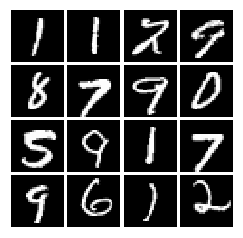

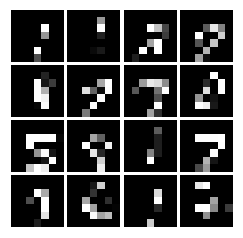

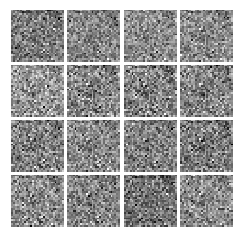


Iter: 0, D: 1.148, G:0.209
Iter: 50, D: 0.1726, G:0.5524
Iter: 100, D: 0.2159, G:0.3405
Iter: 150, D: 0.3002, G:0.3775
Iter: 200, D: 1.374, G:0.2473


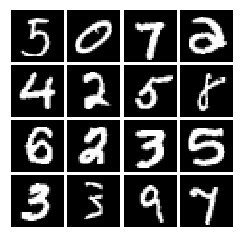

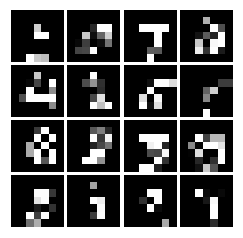

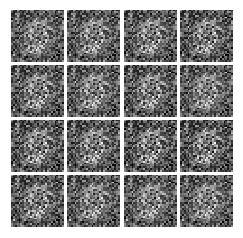


Iter: 250, D: 0.1785, G:0.5878
Iter: 300, D: 0.2812, G:0.6202
Iter: 350, D: 0.4452, G:0.5488
Iter: 400, D: 0.2377, G:0.631
Iter: 450, D: 0.3643, G:0.8954


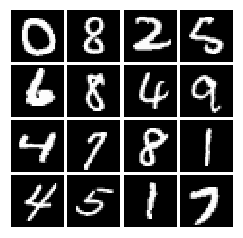

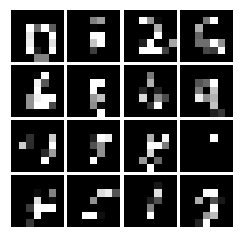

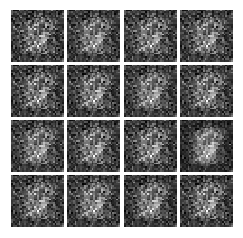


Iter: 500, D: 1.051, G:0.5288
Iter: 550, D: 0.7923, G:0.683
Iter: 600, D: 0.4045, G:0.7454
Iter: 650, D: 0.206, G:0.6069
Iter: 700, D: 0.4395, G:0.8803


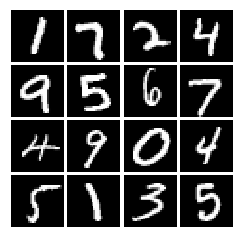

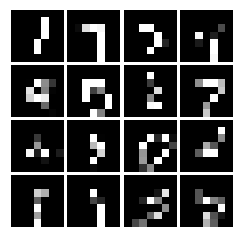

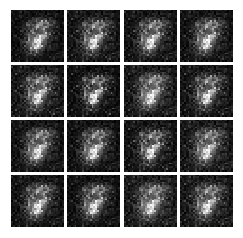


Iter: 750, D: 0.6486, G:0.8933
Iter: 800, D: 0.4403, G:0.8378
Iter: 850, D: 1.148, G:0.8607
Iter: 900, D: 0.3961, G:0.8629
Iter: 950, D: 0.7192, G:1.104


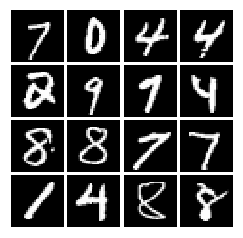

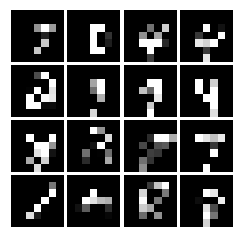

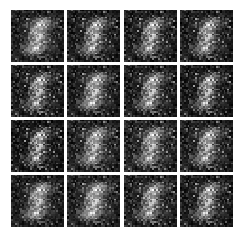


Iter: 1000, D: 0.635, G:0.8857
Iter: 1050, D: 1.154, G:0.8713
Iter: 1100, D: 0.306, G:0.8811
Iter: 1150, D: 1.211, G:1.254
Iter: 1200, D: 0.5595, G:0.8901


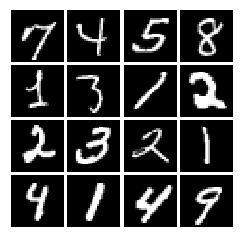

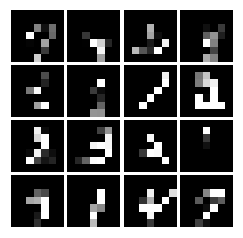

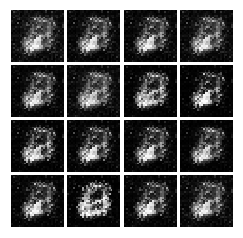


Iter: 1250, D: 0.5506, G:1.319
Iter: 1300, D: 1.343, G:0.9667
Iter: 1350, D: 0.5197, G:0.8116
Iter: 1400, D: 0.8351, G:0.9094
Iter: 1450, D: 0.8333, G:0.9226


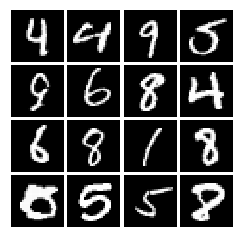

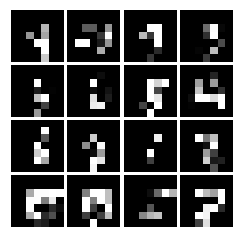

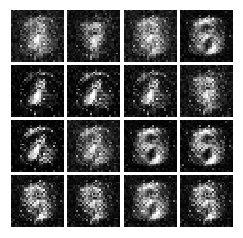


Iter: 1500, D: 0.8003, G:0.9078
Iter: 1550, D: 1.237, G:0.9597
Iter: 1600, D: 1.209, G:0.9241
Iter: 1650, D: 0.6547, G:0.8848
Iter: 1700, D: 0.9975, G:0.9173


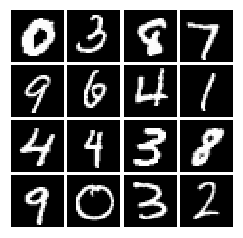

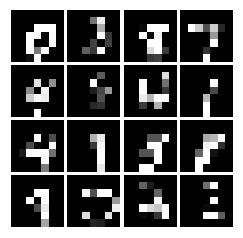

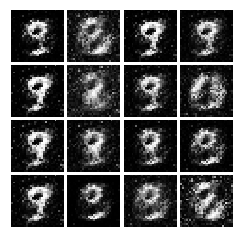


Iter: 1750, D: 1.033, G:0.9035
Iter: 1800, D: 0.8526, G:0.8794
Iter: 1850, D: 1.23, G:0.8939
Iter: 1900, D: 1.119, G:0.9246
Iter: 1950, D: 1.009, G:0.8889


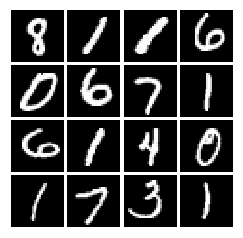

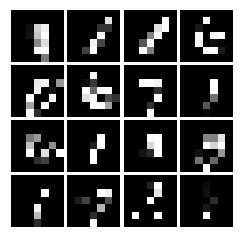

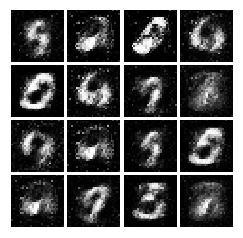


Iter: 2000, D: 1.084, G:0.871
Iter: 2050, D: 1.07, G:0.9003
Iter: 2100, D: 1.01, G:0.8135
Iter: 2150, D: 1.155, G:0.8676
Iter: 2200, D: 1.116, G:0.875


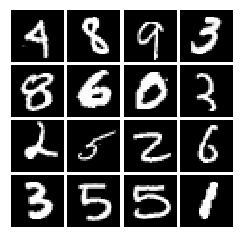

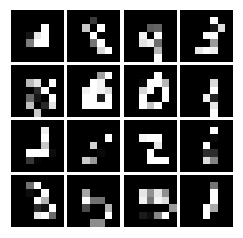

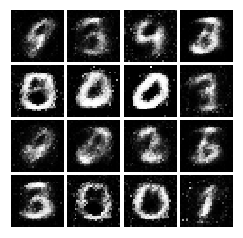


Iter: 2250, D: 1.265, G:0.8832
Iter: 2300, D: 1.263, G:0.8545
Iter: 2350, D: 1.141, G:0.9018
Iter: 2400, D: 1.329, G:0.8315
Iter: 2450, D: 1.157, G:0.8596


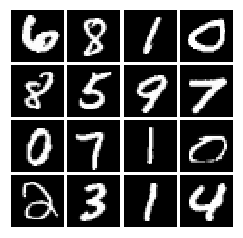

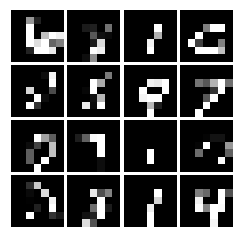

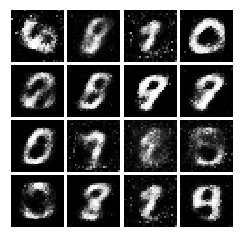


Iter: 2500, D: 1.241, G:0.8656
Iter: 2550, D: 1.122, G:0.8325
Iter: 2600, D: 1.175, G:0.8888
Iter: 2650, D: 1.224, G:0.8509
Iter: 2700, D: 1.222, G:0.8095


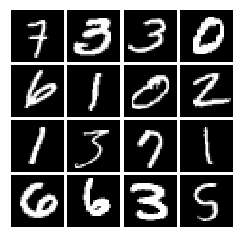

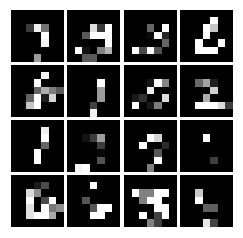

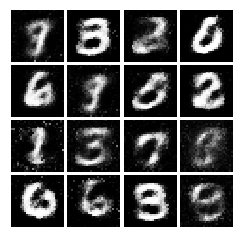


Iter: 2750, D: 1.056, G:0.8481
Iter: 2800, D: 1.175, G:0.8853
Iter: 2850, D: 1.117, G:0.848
Iter: 2900, D: 1.234, G:0.8721
Iter: 2950, D: 1.202, G:0.8691


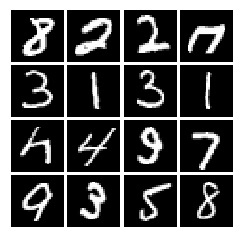

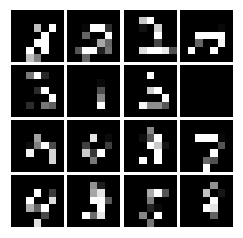

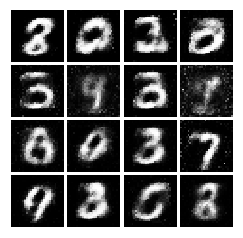


Iter: 3000, D: 1.17, G:0.8314
Iter: 3050, D: 1.118, G:0.8691
Iter: 3100, D: 1.098, G:0.8435
Iter: 3150, D: 1.244, G:0.8589
Iter: 3200, D: 1.111, G:0.868


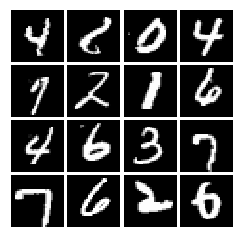

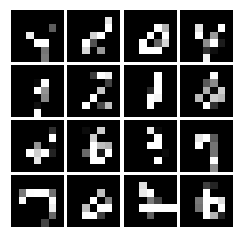

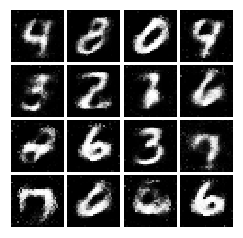


Iter: 3250, D: 1.259, G:0.8542
Iter: 3300, D: 1.131, G:0.87
Iter: 3350, D: 1.186, G:0.8788
Iter: 3400, D: 1.097, G:0.8533
Iter: 3450, D: 1.239, G:0.856


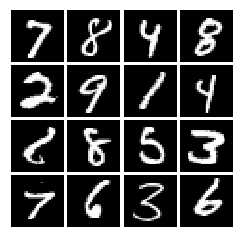

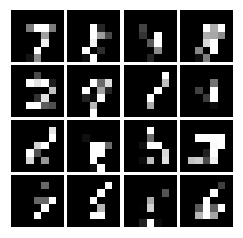

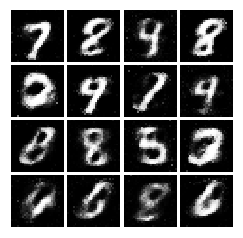


Iter: 3500, D: 1.142, G:0.8824
Iter: 3550, D: 1.348, G:0.8805
Iter: 3600, D: 1.163, G:0.8817
Iter: 3650, D: 1.172, G:0.8784
Iter: 3700, D: 1.184, G:0.8344


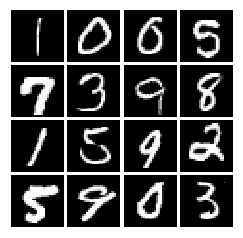

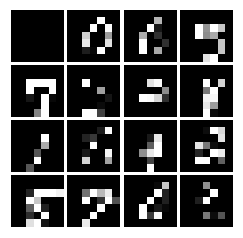

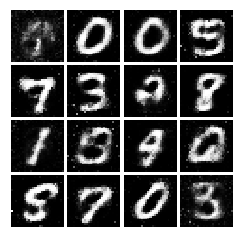


Iter: 3750, D: 1.095, G:0.8752
Iter: 3800, D: 1.21, G:0.8592
Iter: 3850, D: 1.286, G:0.8812
Iter: 3900, D: 1.092, G:0.867
Iter: 3950, D: 1.207, G:0.8619


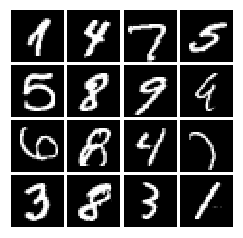

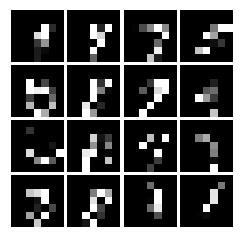

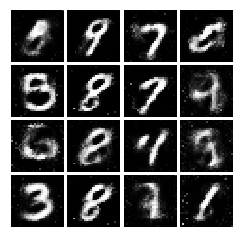


Iter: 4000, D: 1.179, G:0.852
Iter: 4050, D: 1.233, G:0.8743
Iter: 4100, D: 1.267, G:0.8613
Iter: 4150, D: 1.087, G:0.8562
Iter: 4200, D: 1.114, G:0.8805


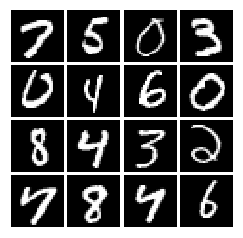

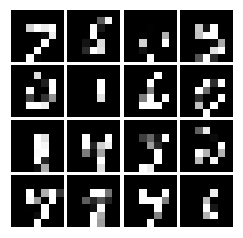

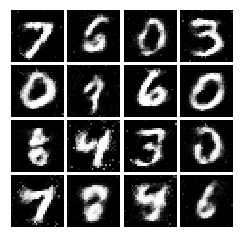


Iter: 4250, D: 1.202, G:0.8889
Final images


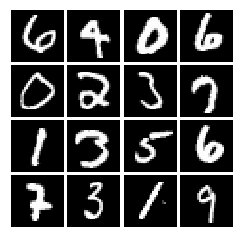

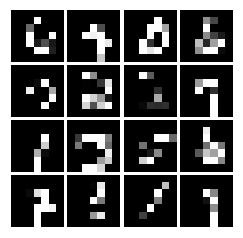

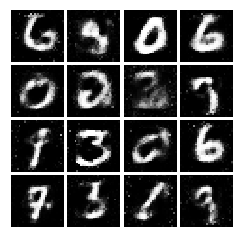

test accuracy vanilla GAN 0.695312


In [71]:
sess = get_session()
sess.run(tf.global_variables_initializer())
vanilla_gan_output_images = run_a_gan(sess,G_train_step,G_loss,D_train_step,D_loss,G_extra_step,D_extra_step)
print("test accuracy vanilla GAN %g"%sess_classifier.run(accuracy, feed_dict={
    x_class: vanilla_gan_output_images, y_: testbatch_y, keep_prob: 1.0}))

In [100]:
# get probability distribution for a single image
img_index = 5 # SET THIS to whichever image from the batch you want

# softmax distributions 
prob_dist_orig = sess_classifier.run(y_conv, feed_dict={
    x_class: testbatch, y_: testbatch_y, keep_prob: 1.0})
prob_dist_vanilla = sess_classifier.run(y_conv, feed_dict={
    x_class: vanilla_gan_output_images, y_: testbatch_y, keep_prob: 1.0})

# the correct values
predicted_val_orig = sess_classifier.run(tf.argmax(y_conv,1), feed_dict={
    x_class: testbatch, y_: testbatch_y, keep_prob: 1.0})
predicted_val_vanilla = sess_classifier.run(tf.argmax(y_conv,1), feed_dict={
    x_class: vanilla_gan_output_images, y_: testbatch_y, keep_prob: 1.0})
true_val_orig = sess_classifier.run( tf.argmax(y_,1), feed_dict={
    x_class: testbatch, y_: testbatch_y, keep_prob: 1.0})
true_val_vanilla = sess_classifier.run( tf.argmax(y_,1), feed_dict={
    x_class: vanilla_gan_output_images, y_: testbatch_y, keep_prob: 1.0})


# do we have a correct prediction?
correctness_orig = sess_classifier.run(correct_prediction, feed_dict={
    x_class: testbatch, y_: testbatch_y, keep_prob: 1.0})
correctness_vanilla = sess_classifier.run(correct_prediction, feed_dict={
    x_class: vanilla_gan_output_images, y_: testbatch_y, keep_prob: 1.0})

print('index', img_index)
print('predicted original', predicted_val_orig[img_index])
print('predicted vanilla', predicted_val_vanilla[img_index])
print('true original', true_val_orig[img_index])

print("correctness for original test image (full resolution)" +  str(correctness_orig[img_index]))
print("correctness for vanilla generated test images (superresolved)" +  str(correctness_vanilla[img_index]))

print( testbatch_y[img_index])
print("probability distribution for original test image (full resolution)" +  str(softmax(prob_dist_orig[img_index])))
print("probability distribution for vanilla generated test images (superresolved)" +  str(softmax(prob_dist_vanilla[img_index])))

index 5
predicted original 2
predicted vanilla 2
true original 2
correctness for original test image (full resolution)True
correctness for vanilla generated test images (superresolved)True
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
probability distribution for original test image (full resolution)[  5.59784892e-11   1.11528712e-12   1.00000000e+00   3.31804861e-10
   1.32501995e-12   2.78852479e-15   3.79306992e-13   3.94236227e-10
   1.94434691e-10   3.41024561e-12]
probability distribution for vanilla generated test images (superresolved)[  4.62225614e-12   2.12354336e-16   1.00000000e+00   1.53353930e-18
   1.30024756e-15   9.95287536e-18   8.47518668e-18   4.32498742e-12
   8.56257748e-18   2.22998751e-23]


(128,)
(128, 10)
[[11  0  0  0  0  0  0  1  0  0]
 [ 0 11  0  0  0  1  0  0  0  0]
 [ 0  0 18  1  0  0  0  0  0  0]
 [ 0  1  1  9  0  1  0  0  0  0]
 [ 0  2  0  1 12  0  0  1  0  0]
 [ 1  0  1  1  0  4  0  0  0  0]
 [ 0  0  1  1  0  2 12  0  0  0]
 [ 0  2  2  0  0  0  0 11  0  0]
 [ 0  0  2  0  1  2  0  0  1  0]
 [ 0  3  0  0  1  1  0  8  0  0]]


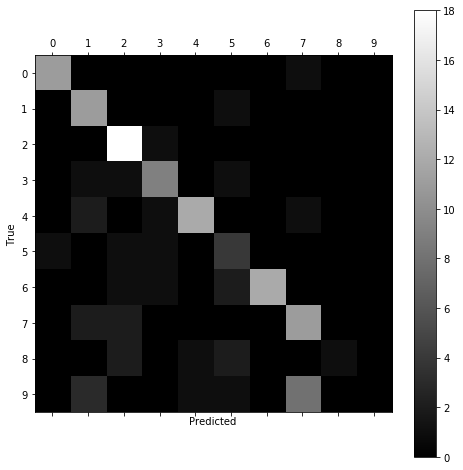

In [114]:
print (predicted_val_vanilla.shape)
print (testbatch_y.shape)
plot_confusion_matrix(predicted_val_vanilla, true_val_orig)

###### Test if classifier cell still works after all the above CGAN code is done running

In [3]:
# Load MNIST Data: download and read in the data automatically
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# INPUTS

# Start TensorFlow Interactivesess_classifierion
import tensorflow as tf
sess_classifier = tf.InteractiveSession()

# Placeholders: We start building the computation graph by creating nodes for the input images and target output classes
x_class = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Variables: weights and biases
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# takes initial values (in this case tensors full of zeros) that have already been specified, and assigns them to each Variable
sess_classifier.run(tf.global_variables_initializer())

# ---------- Regression Model -------------
# Predicted Class
y = tf.matmul(x_class,W) + b

# Loss Function
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))


# Build a Multilayer Convolutional Network (accuracy: )

# Weight Initialization
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

# Convolution and Pooling
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# First Convolutional Layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# reshape x to a 4d tensor
x_image = tf.reshape(x_class, [-1,28,28,1])

# convolve x_image with the weight tensor, add the bias, apply the ReLU function, and finally max pool
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1) # The max_pool_2x2 method will reduce the image size to 14x14

# Second Convolutional Layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


# Densely Connected Layer: add a fully-connected layer with 1024 neurons to allow processing on the entire image
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout: To reduce overfitting, we will apply dropout before the readout layer
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Readout Layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# Train and Evaluate the Model
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess_classifier.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x_class:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x_class: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x_class: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.12
step 100, training accuracy 0.82
step 200, training accuracy 0.88
step 300, training accuracy 0.96
step 400, training accuracy 0.94
step 500, training accuracy 0.98
step 600, training accuracy 0.96
step 700, training accuracy 0.96
step 800, training accuracy 0.98
step 900, training accuracy 0.98
step 1000, training accuracy 0.92
step 1100, training accuracy 0.96
step 1200, training accuracy 1
step 1300, training accuracy 0.98
step 1400, training accuracy 0.92
step 1500, training accuracy 0.98
step 1600, training accuracy 0.9
step 1700, training accuracy 1
step 1800, training accuracy 1
step 1900, training accuracy 0.98
step 2000, training accuracy 0.96
step 2100, training accuracy 0.94
step 2200, training accuracy 1
step 2300, training accuracy 1
step 2400, trainin

In [ ]:
# Save checkpoint
saver = tf.train.Saver()
saver.save(sess_classifier, 'checkpoint_mnist/model.ckpt')

In [ ]:
# DON'T RUN IT HERE -- must run it above
print("test accuracy CGAN %g"%accuracy.eval(feed_dict={
    x_class: cgan_output_images, y_: cgan_output_labels, keep_prob: 1.0}))

In [ ]:
# DON'T RUN IT HERE -- must run it above
print("test accuracy vanilla GAN %g"%accuracy.eval(feed_dict={
    x_class: vanilla_gan_output_imagse, y_: vanilla_gan_output_labels, keep_prob: 1.0}))